<h1>The Blood Transfusion Service Center Dataset</h1>

<p style="padding:5px;">Given our mission, we're interested in predicting if a blood donor will donate within a given time window.</p>

<p style="padding-left:6px">Predict if the donor will give in March 2007
The goal is to predict the last column, whether he/she donated blood in March 2007.</p>

<p style="padding-left:10px">Use information about each donor's history</p>
<ul>
    <li><strong>Months since Last Donation :</strong> this is the number of monthis since this donor's most recent donation.</li>
    <li><strong>Number of Donations :</strong> this is the total number of donations that the donor has made.</li>
    <li><strong>Total Volume Donated :</strong> this is the total amound of blood that the donor has donated in cubuc centimeters.</li>
<li><strong>Months since First Donation:</strong> this is the number of months since the donor's first donation.</li>
</ul>

<h3 style="padding-left:10px">Importing Necessary Libraries</h3>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

<h3 style="padding-left:10px">Reading the dataset</h3>

<p style="padding-left:10px">We have two files <b>Blood.csv</b> and <b>BloodTestData.csv</b></p>
<ul><li><b>Blood.csv</b> : Training data</li>
    <li><b>BloodTestData.csv</b> : Test data</li></ul>

In [10]:
# Train data
df_train = pd.read_csv("Blood.csv")
df_train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [11]:
# Test data
df_test = pd.read_csv("BloodTestData.csv")
df_test.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


<p>So this is how our data looks like, you can see we have multiple columns in our data but the Unnamed:0 should be either removed or labeled.</p>

In [20]:
#labelling
df_train.rename(columns={"Unnamed: 0":"Donor_id"},inplace=True)
df_train.head()

,Donor_id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [21]:
df_test.rename(columns={"Unnamed: 0":"Donor_id"},inplace=True)
df_test.head()

,Donor_id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


<p>We will explore our data now.</p>

In [22]:
df_train.shape, df_test.shape

((576, 6), (200, 5))

In [25]:
df_train.info()
print("\n--------------------------------------\n")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
Donor_id                       576 non-null int64
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB

--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Donor_id                       200 non-null int64
Months since Last Donation     200 non-null int64
Number of Donations            200 non-null int64
Total Volume Donated (c.c.)    200 non-null int64
Months since First Donation    200 non-null int64
dtypes: int64(5)
memory usage: 7.9 KB


<b>No missing values</b>

In [29]:
#Statistical Inference

df_train.describe()

,Donor_id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [30]:
df_test.describe()

,Donor_id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,374.565000,9.49500,5.935000,1483.750000,35.475000
std,211.138231,7.61907,6.125224,1531.305955,25.111197
min,1.000000,0.00000,1.000000,250.000000,2.000000
25%,198.250000,4.00000,2.000000,500.000000,14.000000
50%,377.500000,7.00000,4.000000,1000.000000,31.000000
75%,537.000000,14.00000,8.000000,2000.000000,52.000000
max,745.000000,40.00000,41.000000,10250.000000,98.000000


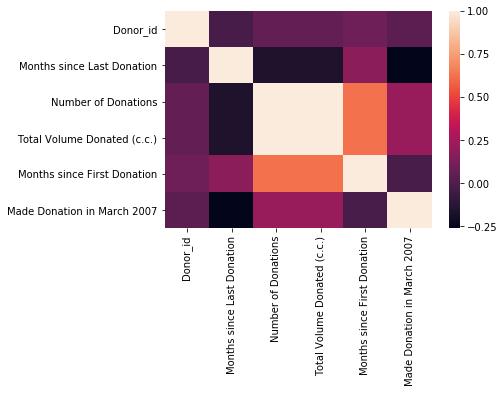

In [32]:
# Correlation
train_corr = df_train.corr()
sns.heatmap(train_corr)

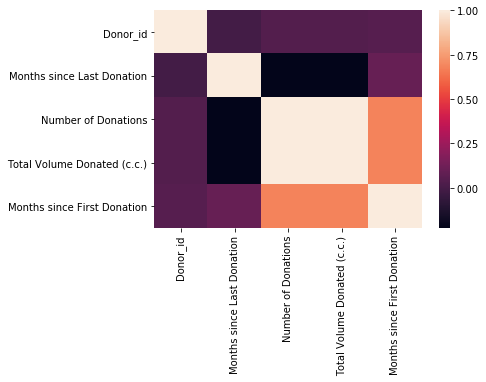

In [33]:
test_corr = df_test.corr()
sns.heatmap(test_corr)

<h1>Data Preprocessing</h1>

In [35]:
# Training data
X_train = df_train.iloc[:,[1,2,3,4]].values
y_train = df_train.iloc[:,-1].values

In [39]:
X_train,y_train

(array([[    2,    50, 12500,    98],
        [    0,    13,  3250,    28],
        [    1,    16,  4000,    35],
        ...,
        [   21,     2,   500,    52],
        [   39,     1,   250,    39],
        [   72,     1,   250,    72]]),
 array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

In [40]:
# Test data
X_test = df_test.iloc[:,[1,2,3,4]].values

In [41]:
X_test

array([[    2,    12,  3000,    52],
       [   21,     7,  1750,    38],
       [    4,     1,   250,     4],
       [   11,    11,  2750,    38],
       [    4,    12,  3000,    34],
       [    3,    21,  5250,    42],
       [    4,     2,   500,     4],
       [   14,     1,   250,    14],
       [   23,     2,   500,    87],
       [   14,     4,  1000,    64],
       [   13,     3,   750,    16],
       [   11,     7,  1750,    62],
       [    5,    11,  2750,    75],
       [    4,     1,   250,     4],
       [    4,     4,  1000,    26],
       [   11,     1,   250,    11],
       [   11,     6,  1500,    26],
       [    7,    14,  3500,    48],
       [   23,    14,  3500,    93],
       [    3,     4,  1000,    29],
       [    2,     7,  1750,    29],
       [    4,     6,  1500,    35],
       [    5,     7,  1750,    26],
       [    4,     1,   250,     4],
       [    2,     3,   750,    38],
       [    5,    14,  3500,    86],
       [    2,     2,   500,    11],
 

In [42]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)

X_test = Scaler.fit_transform(X_test)

In [43]:
X_train, X_test

(array([[-0.91073873,  7.77205216,  7.77205216,  2.6418237 ],
        [-1.15558611,  1.32046785,  1.32046785, -0.24994586],
        [-1.03316242,  1.84356928,  1.84356928,  0.0392311 ],
        ...,
        [ 1.41531137, -0.59757073, -0.59757073,  0.74151799],
        [ 3.61893779, -0.77193788, -0.77193788,  0.20447507],
        [ 7.65891955, -0.77193788, -0.77193788,  1.56773787]]),
 array([[-0.98618442,  0.99265264,  0.99265264,  0.65972434],
        [ 1.51381612,  0.17430751,  0.17430751,  0.10080508],
        [-0.72302647, -0.80770664, -0.80770664, -1.25657026],
        [ 0.19802636,  0.82898361,  0.82898361,  0.10080508],
        [-0.72302647,  0.99265264,  0.99265264, -0.05888614],
        [-0.85460545,  2.46567387,  2.46567387,  0.2604963 ],
        [-0.72302647, -0.64403762, -0.64403762, -1.25657026],
        [ 0.59276329, -0.80770664, -0.80770664, -0.85734222],
        [ 1.77697407, -0.64403762, -0.64403762,  2.05702248],
        [ 0.59276329, -0.31669956, -0.31669956,  1.1387

<h1>Logistic Regression</h1>
<p style="padding-left:10px">Building a Logistic Regression model</p>

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
y_pred = classifier.predict(X_test)

In [77]:
score = classifier.score(X_train,y_train)
score

0.7604166666666666

In [78]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=5)
mean = accuracies.mean()
std = accuracies.std()

In [79]:
mean,std

(0.7795523290986085, 0.024479350901781296)

<h1>Saving result in csv</h1>

In [80]:
df = pd.DataFrame(y_pred,dtype='float32',index=df_test['Donor_id'],columns=['Made Donation in March 2007'])

In [81]:
del df.index.name

In [82]:
df.to_csv('submission.csv')

<h1>Random Forest</h1>

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
score = rf.score(X_train,y_train)
score

0.9201388888888888

In [96]:
y_pred = rf.predict(X_test)

In [97]:
df = pd.DataFrame(y_pred,dtype='float32',index=df_test['Donor_id'],columns=['Made Donation in March 2007'])

In [98]:
del df.index.name

In [99]:
df.to_csv('randomforest.csv')

<h1>XGBoost</h1>

In [83]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,y_train)
score = xg.score(X_train,y_train)
score

0.8402777777777778

In [84]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=xg,X=X_train,y=y_train,cv=10)
mean = accuracies.mean()
std = accuracies.std()

In [85]:
mean,std

(0.7296182266009852, 0.14489544305661795)

In [65]:
y_pred = xg.predict(X_test)

In [66]:
df = pd.DataFrame(y_pred,dtype='float32',index=df_test['Donor_id'],columns=['Made Donation in March 2007'])

In [68]:
del df.index.name

In [70]:
df.to_csv('xgboost.csv')